In [1]:
import os
import numpy as np
import random
from skimage import io
import imgaug.augmenters as iaa
import imgaug.augmenters.flip as flip
import cv2 as cv2
import cv2
import Augmentor
import keras.utils as image
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [2]:
root = r'C:\Users\harsh\Desktop\Gray_scale'
for i in range(0,16):
    directory_path = os.path.join(root,f'signature_{i+1}')
    if not os.path.exists(directory_path):
        os.mkdir(directory_path)
    else:
        print(f"Directory '{directory_path} already exists")

Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_1 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_2 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_3 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_4 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_5 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_6 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_7 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_8 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_9 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_10 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_11 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_12 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_13 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_14 al

In [3]:
data_dir = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i , directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
rename_folders(data_dir)

In [4]:
def load_and_augment_data(folder_path, num_augmentations=20):
    augmenter = iaa.Sequential([
        iaa.Affine(rotate=(-25, 25), scale=(0.8, 1.2)),
        flip.Fliplr(p=0.5)
    ])

    X = []
    y = []

    classes = os.listdir(folder_path)
    for i, cls in enumerate(classes):
        cls_path = os.path.join(folder_path, cls)
        images = os.listdir(cls_path)
        for img in images:
            img_path = os.path.join(cls_path, img)
            #load the image
            image = io.imread(img_path)
            #apply the augmentation and save the new images
            for j in range(num_augmentations):
                aug_image = augmenter.augment_image(image)
                X.append(aug_image)
                y.append(i)

    X = np.array(X)
    y = np.array(y)

    #Shuffle the data
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    return X, y

In [5]:
load_and_augment_data(data_dir)

(array([[[[208, 209, 213],
          [209, 210, 214],
          [211, 212, 216],
          ...,
          [215, 216, 218],
          [214, 215, 219],
          [214, 215, 219]],
 
         [[209, 210, 214],
          [210, 211, 215],
          [212, 213, 217],
          ...,
          [215, 216, 218],
          [214, 215, 219],
          [213, 214, 218]],
 
         [[209, 210, 214],
          [211, 212, 216],
          [212, 213, 217],
          ...,
          [214, 215, 217],
          [213, 214, 218],
          [212, 213, 217]],
 
         ...,
 
         [[216, 216, 228],
          [217, 217, 229],
          [219, 219, 231],
          ...,
          [209, 210, 215],
          [212, 213, 218],
          [213, 214, 219]],
 
         [[217, 217, 229],
          [218, 218, 230],
          [219, 219, 231],
          ...,
          [210, 211, 216],
          [212, 213, 218],
          [213, 214, 219]],
 
         [[220, 220, 232],
          [220, 220, 232],
          [220, 220, 232],
   

In [6]:
# code for grayscale images

directory = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

gray_path = r'C:\Users\Harsh\Desktop\Gray_scale'

def gray(directory):
    for root, dirs, files, in os.walk(directory):
        for i, directory in enumerate(dirs):
            print(i+1, directory)
            old_dir = os.path.join(root, directory)

            old_gray = os.path.join(gray_path, f'signature_{i+1}')
            for j, file_name in enumerate((os.listdir(old_dir))):
                filename = f'signature_{j+1}.jpg'
                #print(filename)
                img = cv2.imread((os.path.join(old_dir, filename)))# image read for grayscale

                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                cv2.imwrite((os.path.join(old_gray, f'signature_{j+1}.jpg')),gray)
                
            
gray(directory)

1 subject_1
2 subject_10
3 subject_11
4 subject_12
5 subject_13
6 subject_14
7 subject_15
8 subject_16
9 subject_2
10 subject_3
11 subject_4
12 subject_5
13 subject_6
14 subject_7
15 subject_8
16 subject_9


In [7]:
p = Augmentor.Pipeline(gray_path)

Initialised with 159 image(s) found.
Output directory set to C:\Users\Harsh\Desktop\Gray_scale\output.

In [8]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [9]:
p.sample(1600)

Processing <PIL.Image.Image image mode=L size=519x276 at 0x1C0AE82E890>: 100%|██████████| 1600/1600 [00:05<00:00, 291.84 Samples/s]


In [10]:
# To rename Augmented Data

data_dir = r'C:\Users\harsh\Desktop\Gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

None


In [11]:
input_folder = r"C:\Users\harsh\Desktop\Gray_scale\output"
splitfolders.ratio (input_folder, output=r"C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_90_10",
                seed=42, ratio=(.90,.10),
                group_prefix=None)

Copying files: 1600 files [00:06, 234.17 files/s]


(519, 276)


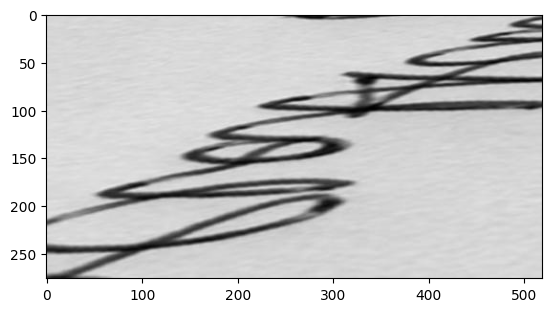

In [12]:
import keras.utils as image
import matplotlib.pyplot as plt
img = image.load_img(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_90_10\train\subject_1\signature_11.jpg')
plt.imshow(img)
print(img.size)

In [13]:
print(cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_90_10\train\subject_1\signature_11.jpg').shape)
cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_90_10\train\subject_1\signature_11.jpg')

(276, 519, 3)


array([[[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [209, 209, 209],
        [199, 199, 199],
        [193, 193, 193]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [174, 174, 174],
        [158, 158, 158],
        [148, 148, 148]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [122, 122, 122],
        [110, 110, 110],
        [104, 104, 104]],

       ...,

       [[108, 108, 108],
        [106, 106, 106],
        [103, 103, 103],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [216, 216, 216]],

       [[ 73,  73,  73],
        [ 72,  72,  72],
        [ 69,  69,  69],
        ...,
        [215, 215, 215],
        [215, 215, 215],
        [215, 215, 215]],

       [[ 58,  58,  58],
        [ 56,  56,  56],
        [ 54,  54,  54],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

In [14]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)


In [15]:
train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_90_10//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_90_10//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1432 images belonging to 16 classes.
Found 168 images belonging to 16 classes.


In [16]:
batch_size=50

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_90_10//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

# same generator for validation data
validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_90_10//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

num_samples = len(train_generator)
X_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    X_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

Found 1432 images belonging to 16 classes.
Found 168 images belonging to 16 classes.


# 25 EPOCH

In [17]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 25
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/25
35/35 [==============================] - 4s 99ms/step - loss: 2.8756 - accuracy: 0.0754 - val_loss: 2.7917 - val_accuracy: 0.0655
Epoch 2/25
35/35 [==============================] - 3s 100ms/step - loss: 2.7945 - accuracy: 0.0628 - val_loss: 2.7753 - val_accuracy: 0.0655
Epoch 3/25
35/35 [==============================] - 3s 89ms/step - loss: 2.7886 - accuracy: 0.0796 - val_loss: 2.8172 - val_accuracy: 0.0714
Epoch 4/25
35/35 [==============================] - 3s 89ms/step - loss: 2.7921 - accuracy: 0.0712 - val_loss: 2.7706 - val_accuracy: 0.0655
Epoch 5/25
35/35 [==============================] - 3s 90ms/step - loss: 2.7730 - accuracy: 0.0705 - val_loss: 2.7783 - val_accuracy: 0.0714
Epoch 6/25
35/35 [==============================] - 3s 95ms/step - loss: 2.7638 - accuracy: 0.0803 - val_loss: 2.7833 - val_accuracy: 0.0714
Epoch 7/25
35/35 [==============================] - 3s 92ms/step - loss: 2.7599 - accuracy: 0.0838 - val_loss: 2.7695 - val_accuracy: 0.0595
Epoch 8/25
3

In [18]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

6/6 [==============================] - 0s 30ms/step - loss: 2.7570 - accuracy: 0.1369
Test Loss: 2.7570149898529053
Test Accuracy: 0.1369047611951828
6/6 [==============================] - 0s 29ms/step


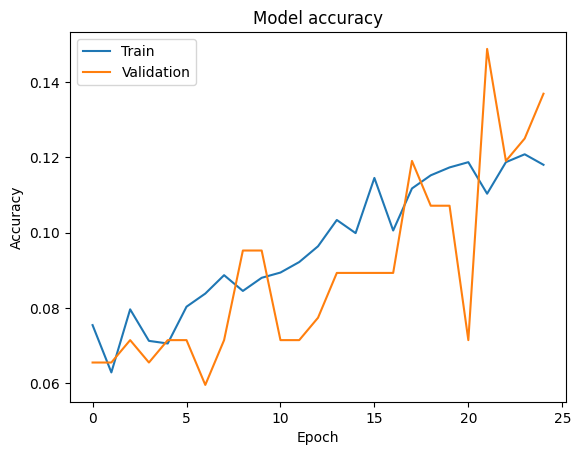

In [19]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


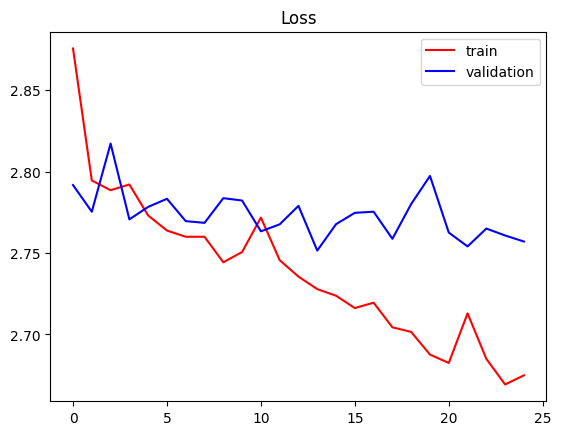

In [20]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 0s 29ms/step


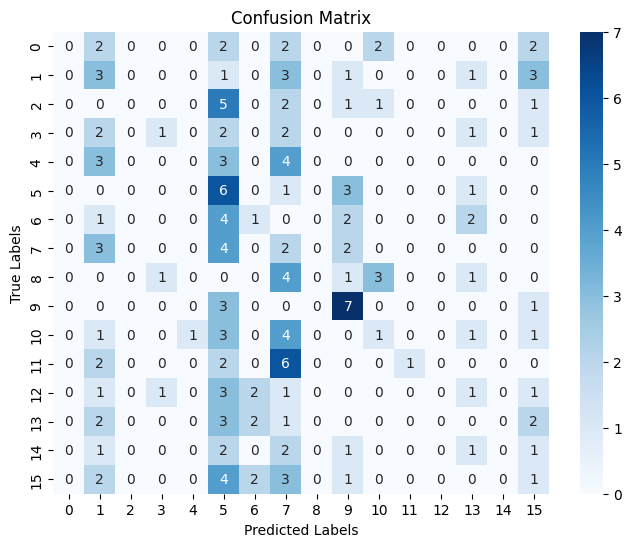

In [21]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.129744560994561
Average False Positive Rate (FPR): 0.0578057267303588
Average True Negative Rate (TNR): 0.9421942732696412
Average False Negative Rate (FNR): 0.870255439005439
Average Precision: 0.14819035338991277
Average Recall: 0.129744560994561
Average F1-Score: 0.09741517170489894


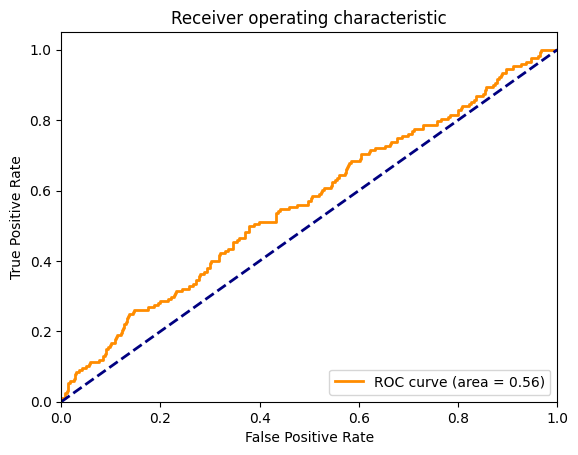

In [23]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 30 EPOCH

In [24]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 30
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/30
35/35 [==============================] - 4s 88ms/step - loss: 2.8521 - accuracy: 0.0705 - val_loss: 2.8088 - val_accuracy: 0.0417
Epoch 2/30
35/35 [==============================] - 3s 87ms/step - loss: 2.7944 - accuracy: 0.0635 - val_loss: 2.7721 - val_accuracy: 0.0893
Epoch 3/30
35/35 [==============================] - 3s 84ms/step - loss: 2.7842 - accuracy: 0.0726 - val_loss: 2.7871 - val_accuracy: 0.0655
Epoch 4/30
35/35 [==============================] - 3s 87ms/step - loss: 2.7790 - accuracy: 0.0796 - val_loss: 2.7808 - val_accuracy: 0.0655
Epoch 5/30
35/35 [==============================] - 3s 88ms/step - loss: 2.7819 - accuracy: 0.0726 - val_loss: 2.7807 - val_accuracy: 0.0833
Epoch 6/30
35/35 [==============================] - 3s 88ms/step - loss: 2.7679 - accuracy: 0.0810 - val_loss: 2.7832 - val_accuracy: 0.0893
Epoch 7/30
35/35 [==============================] - 3s 87ms/step - loss: 2.7662 - accuracy: 0.0782 - val_loss: 2.7970 - val_accuracy: 0.0833
Epoch 8/30
35

In [25]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

6/6 [==============================] - 0s 34ms/step - loss: 2.7970 - accuracy: 0.1012
Test Loss: 2.7970035076141357
Test Accuracy: 0.1011904776096344
6/6 [==============================] - 0s 33ms/step


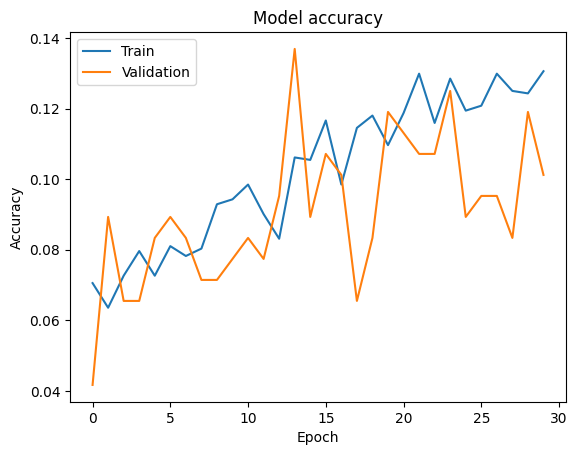

In [26]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


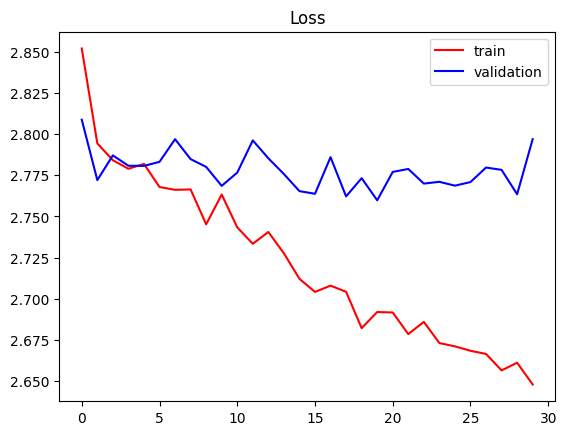

In [27]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 0s 31ms/step


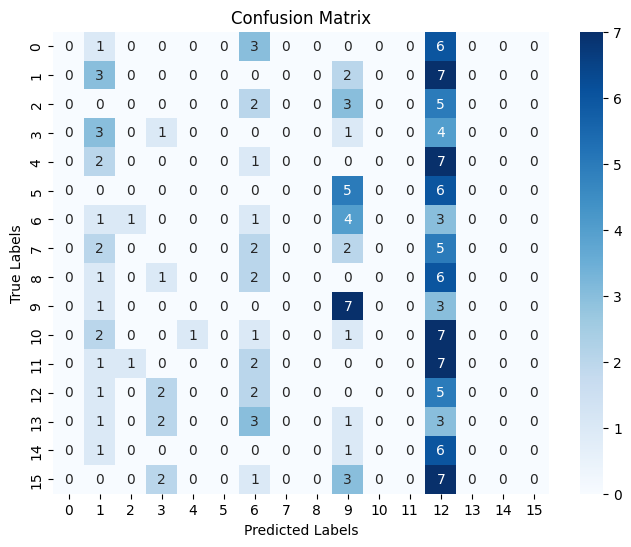

In [28]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.09984217171717172
Average False Positive Rate (FPR): 0.059857761224684586
Average True Negative Rate (TNR): 0.9401422387753154
Average False Negative Rate (FNR): 0.9001578282828283
Average Precision: 0.038487787356321836
Average Recall: 0.09984217171717172
Average F1-Score: 0.05102312022684356


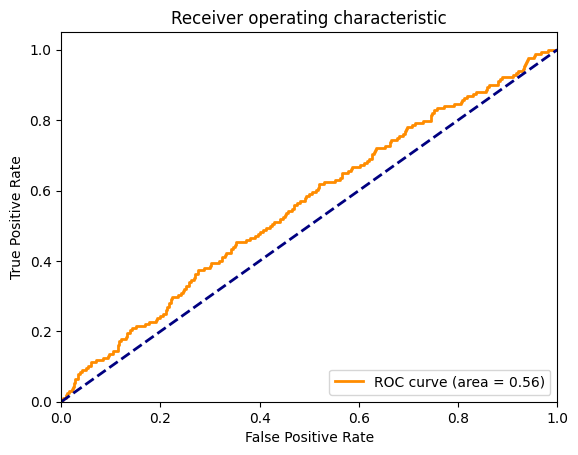

In [30]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 35 EPOCH

In [31]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 35
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/35
35/35 [==============================] - 4s 93ms/step - loss: 2.8849 - accuracy: 0.0594 - val_loss: 2.8061 - val_accuracy: 0.0595
Epoch 2/35
35/35 [==============================] - 3s 91ms/step - loss: 2.8151 - accuracy: 0.0705 - val_loss: 2.7688 - val_accuracy: 0.0714
Epoch 3/35
35/35 [==============================] - 3s 87ms/step - loss: 2.7740 - accuracy: 0.0817 - val_loss: 2.7783 - val_accuracy: 0.0774
Epoch 4/35
35/35 [==============================] - 3s 89ms/step - loss: 2.7669 - accuracy: 0.0901 - val_loss: 2.7801 - val_accuracy: 0.0714
Epoch 5/35
35/35 [==============================] - 3s 89ms/step - loss: 2.7694 - accuracy: 0.0824 - val_loss: 2.7751 - val_accuracy: 0.1012
Epoch 6/35
35/35 [==============================] - 3s 86ms/step - loss: 2.7558 - accuracy: 0.0845 - val_loss: 2.7716 - val_accuracy: 0.0655
Epoch 7/35
35/35 [==============================] - 3s 87ms/step - loss: 2.7606 - accuracy: 0.0971 - val_loss: 2.7724 - val_accuracy: 0.0833
Epoch 8/35
35

In [32]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

6/6 [==============================] - 0s 31ms/step - loss: 2.7665 - accuracy: 0.1190
Test Loss: 2.766517162322998
Test Accuracy: 0.1190476194024086
6/6 [==============================] - 0s 31ms/step


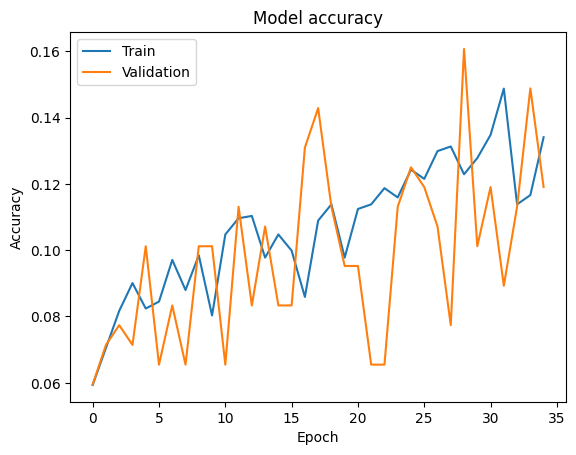

In [33]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


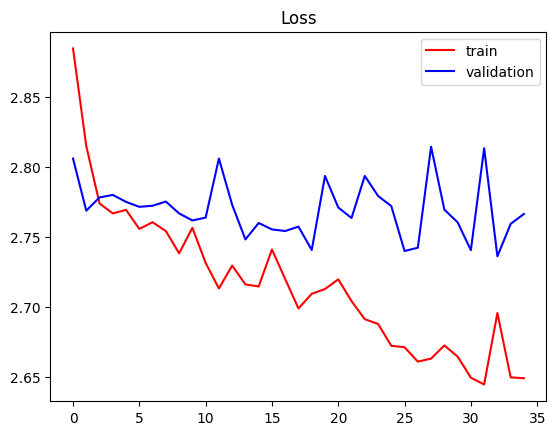

In [34]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 0s 31ms/step


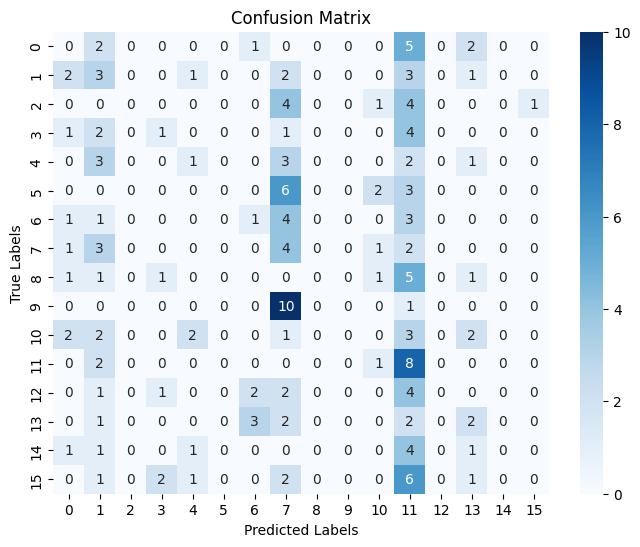

In [35]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.11575126262626263
Average False Positive Rate (FPR): 0.05889558563824317
Average True Negative Rate (TNR): 0.9411044143617568
Average False Negative Rate (FNR): 0.8842487373737373
Average Precision: 0.06593318561871414
Average Recall: 0.11575126262626263
Average F1-Score: 0.07061415912518854


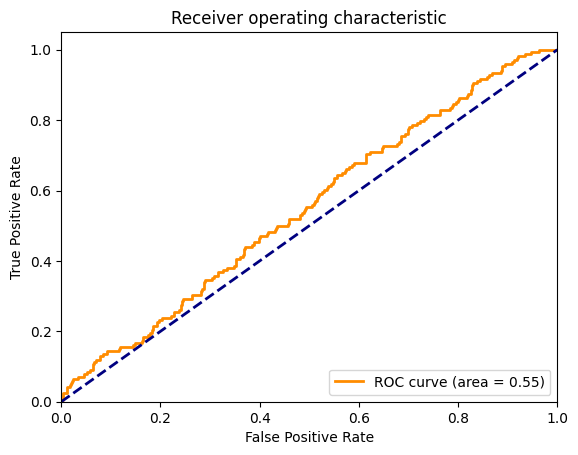

In [37]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 40 EPOCH

In [38]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 40
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/40
35/35 [==============================] - 4s 94ms/step - loss: 2.8772 - accuracy: 0.0789 - val_loss: 2.8214 - val_accuracy: 0.0774
Epoch 2/40
35/35 [==============================] - 3s 87ms/step - loss: 2.8039 - accuracy: 0.0719 - val_loss: 2.7851 - val_accuracy: 0.0655
Epoch 3/40
35/35 [==============================] - 3s 87ms/step - loss: 2.7937 - accuracy: 0.0810 - val_loss: 2.7741 - val_accuracy: 0.0655
Epoch 4/40
35/35 [==============================] - 3s 95ms/step - loss: 2.7706 - accuracy: 0.0831 - val_loss: 2.7832 - val_accuracy: 0.0476
Epoch 5/40
35/35 [==============================] - 3s 95ms/step - loss: 2.7680 - accuracy: 0.0845 - val_loss: 2.7841 - val_accuracy: 0.0833
Epoch 6/40
35/35 [==============================] - 3s 90ms/step - loss: 2.7589 - accuracy: 0.0894 - val_loss: 2.7823 - val_accuracy: 0.0774
Epoch 7/40
35/35 [==============================] - 3s 91ms/step - loss: 2.7343 - accuracy: 0.0887 - val_loss: 2.7842 - val_accuracy: 0.0893
Epoch 8/40
35

In [39]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

6/6 [==============================] - 0s 31ms/step - loss: 2.7496 - accuracy: 0.0833
Test Loss: 2.7495884895324707
Test Accuracy: 0.0833333358168602
6/6 [==============================] - 0s 30ms/step


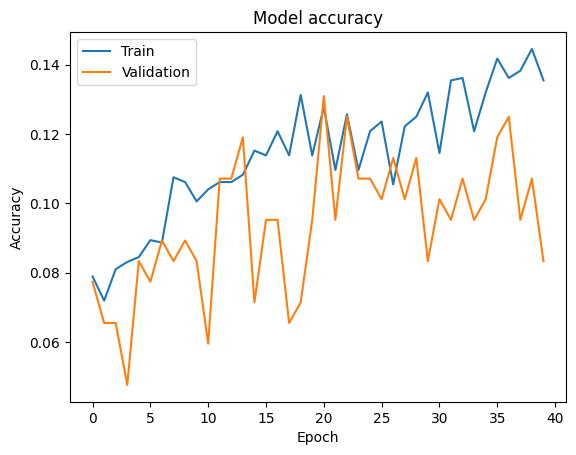

In [40]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


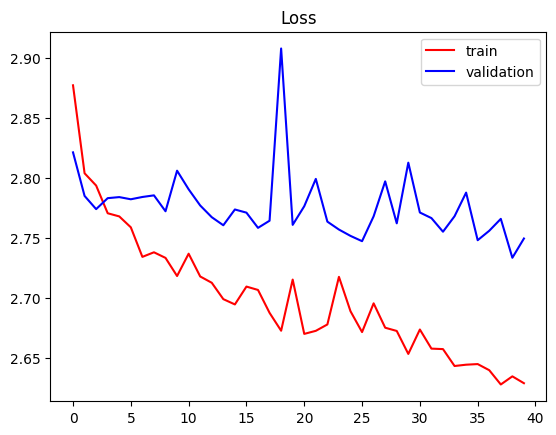

In [41]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 0s 31ms/step


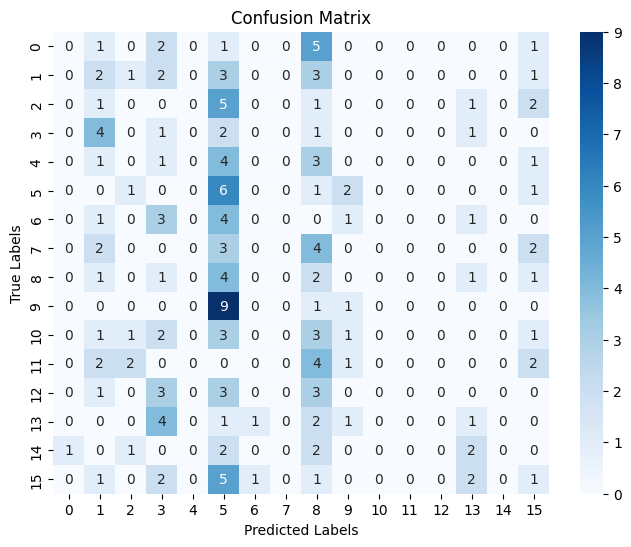

In [42]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.08069153069153069
Average False Positive Rate (FPR): 0.06117955639931168
Average True Negative Rate (TNR): 0.9388204436006883
Average False Negative Rate (FNR): 0.9193084693084693
Average Precision: 0.04089174714174714
Average Recall: 0.08069153069153069
Average F1-Score: 0.047629503092889824


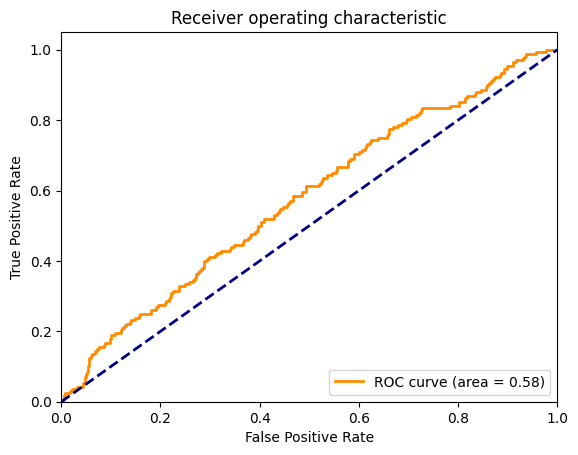

In [44]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 45 EPOCH

In [45]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 45
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/45
35/35 [==============================] - 6s 159ms/step - loss: 2.8790 - accuracy: 0.0628 - val_loss: 2.7940 - val_accuracy: 0.0952
Epoch 2/45
35/35 [==============================] - 4s 126ms/step - loss: 2.7909 - accuracy: 0.0726 - val_loss: 2.7651 - val_accuracy: 0.0655
Epoch 3/45
35/35 [==============================] - 4s 125ms/step - loss: 2.7827 - accuracy: 0.0803 - val_loss: 2.7781 - val_accuracy: 0.1071
Epoch 4/45
35/35 [==============================] - 4s 125ms/step - loss: 2.7887 - accuracy: 0.0740 - val_loss: 2.7827 - val_accuracy: 0.0774
Epoch 5/45
35/35 [==============================] - 4s 125ms/step - loss: 2.7690 - accuracy: 0.0978 - val_loss: 2.7819 - val_accuracy: 0.0833
Epoch 6/45
35/35 [==============================] - 4s 127ms/step - loss: 2.7629 - accuracy: 0.0852 - val_loss: 2.7879 - val_accuracy: 0.0774
Epoch 7/45
35/35 [==============================] - 4s 127ms/step - loss: 2.7677 - accuracy: 0.0803 - val_loss: 2.7860 - val_accuracy: 0.0655
Epoch 

In [46]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

6/6 [==============================] - 0s 40ms/step - loss: 2.7537 - accuracy: 0.1429
Test Loss: 2.753692865371704
Test Accuracy: 0.1428571492433548
6/6 [==============================] - 0s 39ms/step


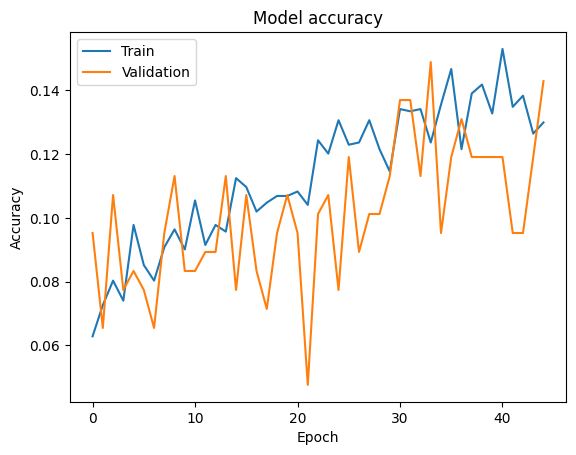

In [47]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


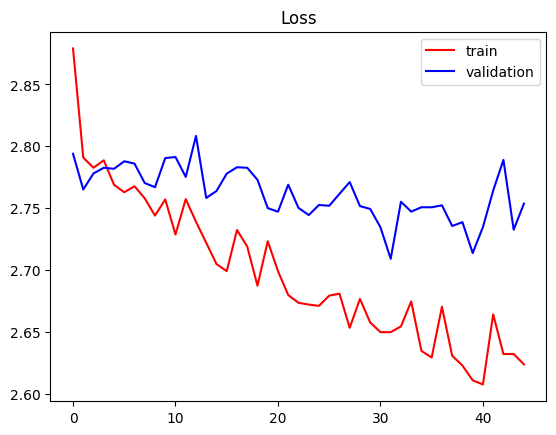

In [48]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 0s 39ms/step


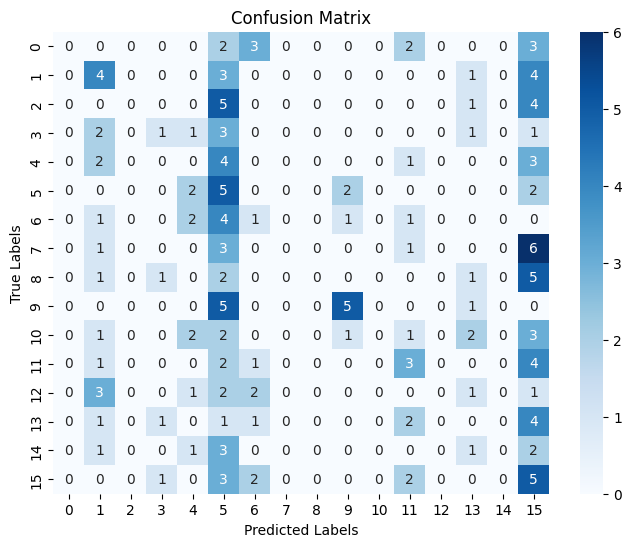

In [49]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.13192987567987569
Average False Positive Rate (FPR): 0.0574932552343187
Average True Negative Rate (TNR): 0.9425067447656813
Average False Negative Rate (FNR): 0.8680701243201243
Average Precision: 0.09793567522480896
Average Recall: 0.13192987567987569
Average F1-Score: 0.1002403846153846


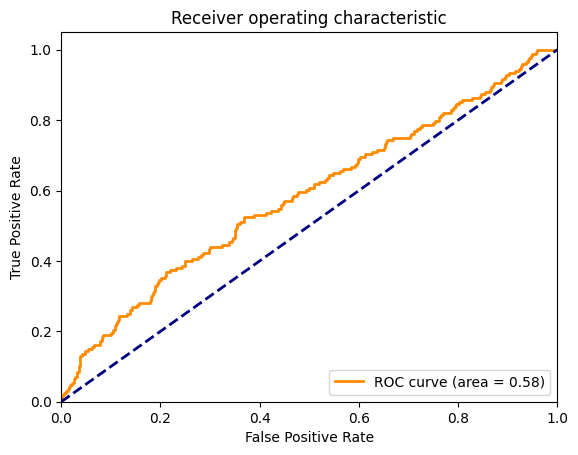

In [51]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 80 EPOCH

In [52]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 80
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/80
35/35 [==============================] - 5s 126ms/step - loss: 2.8922 - accuracy: 0.0559 - val_loss: 2.8032 - val_accuracy: 0.0536
Epoch 2/80
35/35 [==============================] - 4s 115ms/step - loss: 2.8143 - accuracy: 0.0670 - val_loss: 2.7836 - val_accuracy: 0.0595
Epoch 3/80
35/35 [==============================] - 4s 110ms/step - loss: 2.7848 - accuracy: 0.0719 - val_loss: 2.7847 - val_accuracy: 0.0893
Epoch 4/80
35/35 [==============================] - 4s 111ms/step - loss: 2.7825 - accuracy: 0.0677 - val_loss: 2.7832 - val_accuracy: 0.0595
Epoch 5/80
35/35 [==============================] - 4s 112ms/step - loss: 2.7666 - accuracy: 0.0803 - val_loss: 2.7886 - val_accuracy: 0.0595
Epoch 6/80
35/35 [==============================] - 4s 114ms/step - loss: 2.7659 - accuracy: 0.0943 - val_loss: 2.7719 - val_accuracy: 0.0833
Epoch 7/80
35/35 [==============================] - 4s 115ms/step - loss: 2.7540 - accuracy: 0.0838 - val_loss: 2.7879 - val_accuracy: 0.0774
Epoch 

In [53]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

6/6 [==============================] - 0s 40ms/step - loss: 2.7947 - accuracy: 0.0655
Test Loss: 2.79469633102417
Test Accuracy: 0.065476194024086
6/6 [==============================] - 0s 34ms/step


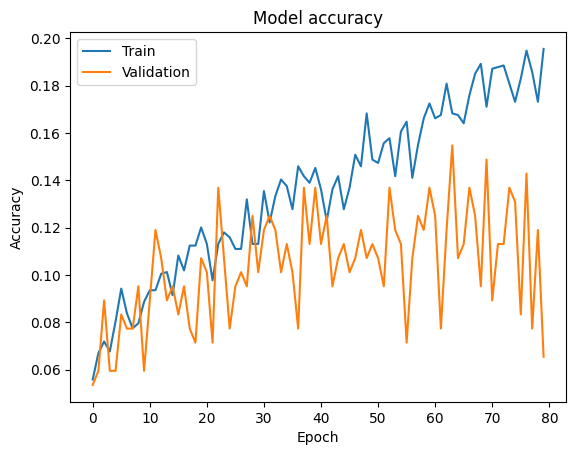

In [54]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


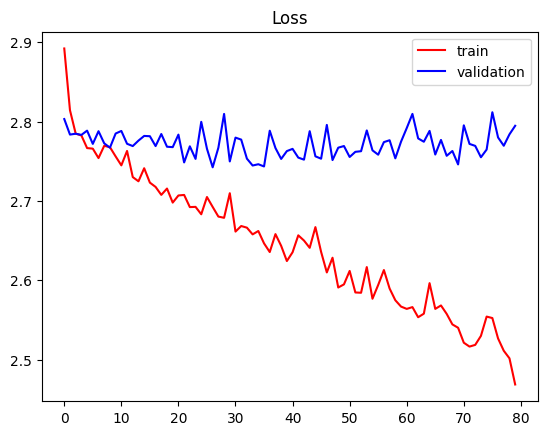

In [55]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 0s 35ms/step


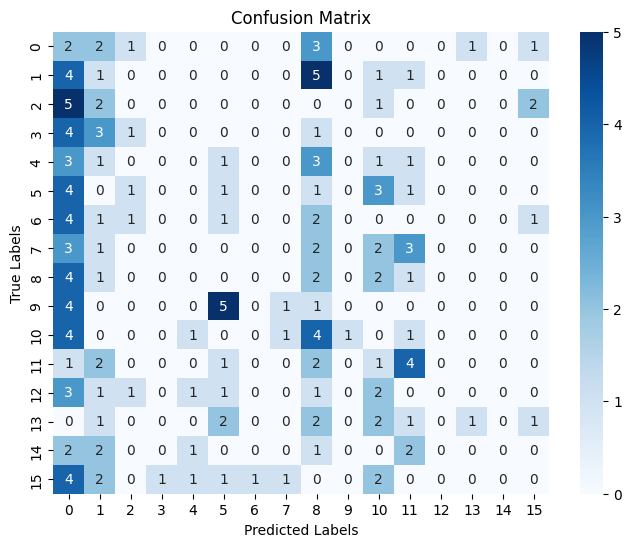

In [56]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [57]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.06486742424242424
Average False Positive Rate (FPR): 0.06239082194193185
Average True Negative Rate (TNR): 0.9376091780580682
Average False Negative Rate (FNR): 0.9351325757575757
Average Precision: 0.062467006033182504
Average Recall: 0.06486742424242424
Average F1-Score: 0.04911037988650693


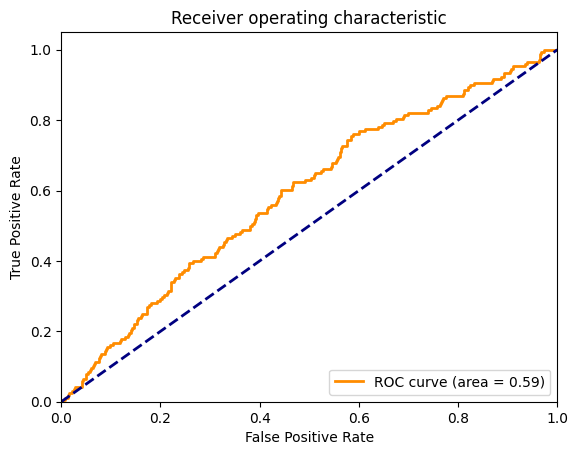

In [58]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()